In [2]:
from vector_operations import Vector

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1,v2) if x1 != x2])

print(f'num_differences([1,2,3],[2,1,3]) = {num_differences([1,2,3],[2,1,3])}')
print(f'num_differences([1,2],[1,2]) = {num_differences([1,2],[1,2])}')

num_differences([1,2,3],[2,1,3]) = 2
num_differences([1,2],[1,2]) = 0


In [3]:
from typing import List
from vector_operations import vector_mean
import random

def cluster_means(k: int,
                 imputs: List[Vector],
                 assignments: List[int]) -> List[Vector]:
    # cluster i contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
        
    # if cluster is empty then just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

In [40]:
import itertools
import tqdm
from vector_operations import squared_distance

class kMeans:
    def __init__(self, k: int) -> None:
        self.k = k # number of clusters
        self.means = None
        
    def classify(self, input: Vector)->int:
        """Return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key = lambda i: squared_distance(input,self.means[i]))
    
    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]
        #print(inputs[:10])
        #print(assignments[:10])
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                #print(self.means)
                new_assignments = [self.classify(input) for input in inputs]
                
                # Check how many assignments changed and if we are done
                
                num_changed = num_differences(assignments, new_assignments)
                
                if num_changed == 0:
                    return
                # Otherwise keep the new assignments and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed}/{len(inputs)}")  

In [5]:
# Example: meetups

inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

random.seed(12)
clusterer = kMeans(k = 3)
clusterer.train(inputs)

means = sorted(clusterer.means) # sort for the unit test

# Check that the means are close to what we expect
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1    

changed: 5/20: : 0it [00:00, ?it/s]


In [8]:
random.seed(12)
clusterer = kMeans(k = 2)
clusterer.train(inputs)


means = sorted(clusterer.means)
assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1    

changed: 1/20: : 0it [00:00, ?it/s]


In [11]:
from matplotlib import pyplot as plt

def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from the k-means clustering of inputs"""
    clusterer = kMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]
    
    return sum(squared_distance(input, means[cluster]) 
               for input, cluster in zip(inputs, assignments))

In [12]:
# now plot from 1 up to len(inputs) clusters

ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

0it [00:00, ?it/s]
changed: 5/20: : 0it [00:00, ?it/s]
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 2/20: : 0it [00:00, ?it/s] 
changed: 9/20: : 0it [00:00, ?it/s] 
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 8/20: : 0it [00:00, ?it/s] 
changed: 10/20: : 0it [00:00, ?it/s]
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 2/20: : 0it [00:00, ?it/s]
changed: 4/20: : 0it [00:00, ?it/s] 
changed: 5/20: : 0it [00:00, ?it/s] 
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 3/20: : 0it [00:00, ?it/s] 
changed: 2/20: : 0it [00:00, ?it/s] 
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 1/20: : 0it [00:00, ?it/s] 
changed: 2/20: : 0it [00:00, ?it/s] 


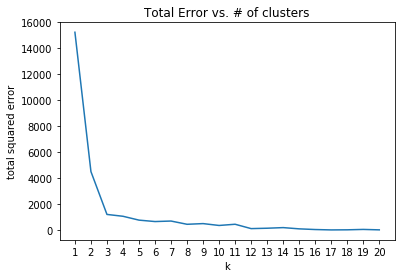

In [14]:
plt.plot(ks,errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of clusters")
plt.show()

In [41]:
# Example: clustering colors
image_path = './new_year.jpg'
import matplotlib.image as mpimg
img = mpimg.imread(image_path)/256

top_row = img[0]
top_lef_pixel = top_row[0]
red, green, blue = top_lef_pixel

# .tolist() converts a numpy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]
    
clusterer = kMeans(k = 5)
clusterer.train(pixels)   # this might take a while

0it [00:00, ?it/s]

[[0.46875, 0.08203125, 0.1015625], [0.47265625, 0.0859375, 0.10546875], [0.4765625, 0.08203125, 0.10546875], [0.46875, 0.07421875, 0.09765625], [0.46484375, 0.05859375, 0.0859375], [0.46484375, 0.05859375, 0.0859375], [0.47265625, 0.06640625, 0.09375], [0.48828125, 0.08203125, 0.109375], [0.4765625, 0.0703125, 0.09765625], [0.48828125, 0.08203125, 0.109375]]
[3, 1, 2, 0, 3, 3, 3, 1, 1, 2]
[[-22.0, -10.0], [3.0, 14.75], [-7.0, 11.0], [-18.333333333333332, 1.0], [-13.666666666666666, -5.666666666666666]]


AssertionError: Vectors should be of the same length